# Kevin's analysis Jupyter Notebook

This is going to be merged with Nik's once we have all the different analysis types we want put together

We start by pulling in the "environment classes" which has the ppo waterworld class inside

In [1]:
from util import environment_classes

let's start by training and examining an instance with a single agent, no cooperation


Finished loop 1 of 3
Finished loop 2 of 3
Finished loop 3 of 3


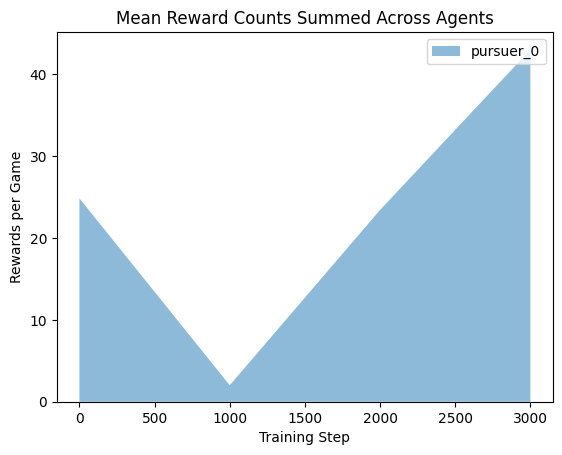

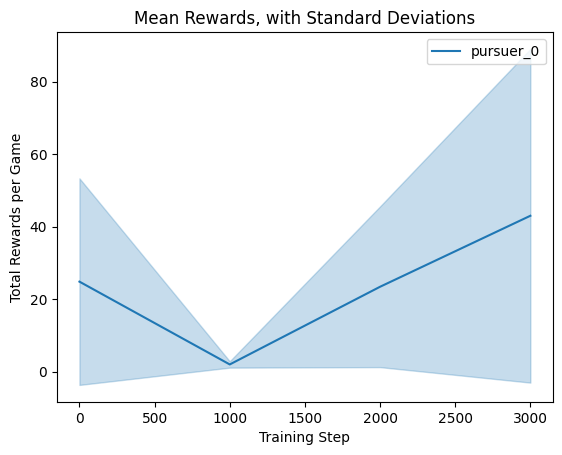

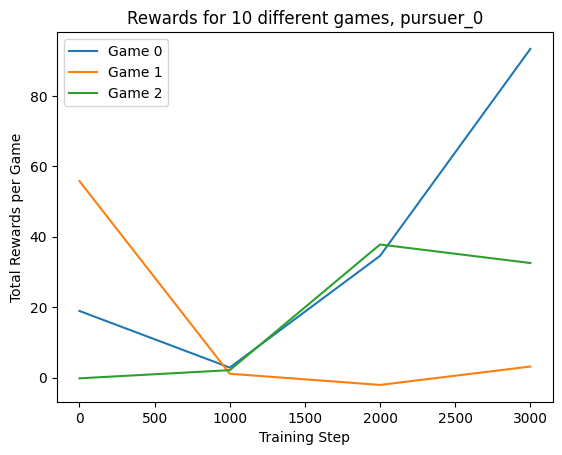

In [2]:
# call the waterworld_ppo class with custom options -- only one agent needs to touch, and only one pursuer
single_agent = environment_classes.waterworld_ppo(log_dir='log_dir/single_agent_preset_env', n_coop = 1, n_pursuers = 1)

# we're going to run a train/test loop. 20 iterations of each, 100,000 steps per training loop, 10 games per evaluation set
single_agent.interlace_run(num_loops=3, num_games=3, num_steps=1000)

# now let's plot the results
single_agent.plot_rewards()

now let's try a basic 4 agent, cooperation = 2 setup. This doesn't use CTDE, so there isn't any coordinated learning in any way

In [ ]:
basic_multi = environment_classes.waterworld_ppo(log_dir='log_dir/basic_multi_short', n_coop = 2, n_pursuers = 4)
basic_multi.interlace_run(num_loops=300, num_games=10, num_steps=10000)
basic_multi.plot_rewards()

In [ ]:
import supersuit as ss
from stable_baselines3 import PPO
from stable_baselines3.ppo import MlpPolicy as PPOMlpPolicy
from pettingzoo.test import seed_test, parallel_seed_test, test_save_obs

from pettingzoo.sisl import waterworld_v4

In [ ]:
env = waterworld_v4.parallel_env() # initialize environment
eval_env = waterworld_v4.env()

In [4]:
import pandas as pd

In [5]:
log_pd = pd.read_csv(single_agent.reward_csv_file)

In [15]:
log_pd_mean = log_pd.groupby('Timestamp')[[key for key in log_pd.keys() if 'pursuer' in key]].mean()

max_ind = log_pd_mean.sum(axis=1).argmax()


AttributeError: 'numpy.float64' object has no attribute 'index'